현대 자동차 데이터를 이용
가격:1135 
년식:2015
연비: 15
마력:100
토크:13.6
연료:가솔린
하이브리드:0
배기량:1368
중량:1035
변속기:수동
    
    


인경우 종류( 준중형, 소형, 대형)
를 예측하시요.
 KNN, decision tree, naive_bayes, svc 
각각의 모델에 대해 
0. 각모델별 예측값 구하시요.
1. f1 score(train, test) , confusion matrix,
를 구하시요

2. 각모델별 train ,test f1 를  bar 그래프로 그리고
가장높은 f1 score 의 모델을 확인하시요.

In [1]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
import multiprocessing
from sklearn.compose import make_column_transformer
from sklearn.svm import SVC #SVM

from sklearn.datasets import load_boston, load_breast_cancer,load_iris
from sklearn.datasets import load_wine
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import OneHotEncoder, LabelEncoder


from sklearn.neighbors import KNeighborsClassifier,KNeighborsRegressor
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, export_graphviz,export_text, plot_tree 
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn import metrics

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.simplefilter('ignore')

In [3]:
df = pd.read_excel('data4/hyundaiCar.xlsx')
df

,가격,년식,종류,연비,마력,토크,연료,하이브리드,배기량,중량,변속기
0,1885,2015,준중형,11.8,172,21.0,가솔린,0,1999,1300,자동
1,2190,2015,준중형,12.3,204,27.0,가솔린,0,1591,1300,자동
2,1135,2015,소형,15.0,100,13.6,가솔린,0,1368,1035,수동
3,1645,2014,소형,14.0,140,17.0,가솔린,0,1591,1090,자동
4,1960,2015,대형,9.6,175,46.0,디젤,0,2497,1990,자동
...,...,...,...,...,...,...,...,...,...,...,...
66,3802,2015,중형,8.5,290,34.8,가솔린,0,3342,1901,자동
67,1270,2012,소형,13.3,108,13.9,가솔린,0,1396,1040,자동
68,2430,2015,준중형,12.8,186,41.0,디젤,0,1995,1665,자동
69,2870,2015,중형,17.7,156,19.3,가솔린,1,1999,1585,자동


In [4]:
x_data = df.drop('종류', axis=1)
y_data = df[['종류']]

In [5]:
x_data

,가격,년식,연비,마력,토크,연료,하이브리드,배기량,중량,변속기
0,1885,2015,11.8,172,21.0,가솔린,0,1999,1300,자동
1,2190,2015,12.3,204,27.0,가솔린,0,1591,1300,자동
2,1135,2015,15.0,100,13.6,가솔린,0,1368,1035,수동
3,1645,2014,14.0,140,17.0,가솔린,0,1591,1090,자동
4,1960,2015,9.6,175,46.0,디젤,0,2497,1990,자동
...,...,...,...,...,...,...,...,...,...,...
66,3802,2015,8.5,290,34.8,가솔린,0,3342,1901,자동
67,1270,2012,13.3,108,13.9,가솔린,0,1396,1040,자동
68,2430,2015,12.8,186,41.0,디젤,0,1995,1665,자동
69,2870,2015,17.7,156,19.3,가솔린,1,1999,1585,자동


In [6]:
y_data

,종류
0,준중형
1,준중형
2,소형
3,소형
4,대형
...,...
66,중형
67,소형
68,준중형
69,중형


In [7]:
# 연료, 변속기 인코딩
from sklearn.compose import make_column_transformer
ct = make_column_transformer((OneHotEncoder(), ['연료', '변속기']), remainder='passthrough')

### 1. KNN 모델

In [8]:
# train, test 분류
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2,
                                                    stratify=y_data, random_state=1 )

In [9]:
# KNN모델 적용
model_knn =  make_pipeline(ct, KNeighborsClassifier(n_neighbors=3)) 
model_knn.fit(x_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(),
                                                  ['연료', '변속기'])])),
                ('kneighborsclassifier', KNeighborsClassifier(n_neighbors=3))])

In [10]:
sample = {'가격':1135, '년식':2015, '연비': 15, '마력':100,
          '토크':13.6, '연료':'가솔린','하이브리드':0,
          '배기량':1368, '중량':1035, '변속기':'수동'}

In [11]:
t_sample = pd.DataFrame([sample])
t_sample

,가격,년식,연비,마력,토크,연료,하이브리드,배기량,중량,변속기
0,1135,2015,15,100,13.6,가솔린,0,1368,1035,수동


1) 예측값

In [12]:
print('예측: ',model_knn.predict(t_sample))

예측:  ['소형']


2) f1 score (train/test)

In [13]:
print('train f1 score: ', model_knn.score(x_train, y_train))
print('test f1 score: ', model_knn.score(x_test, y_test))

train f1 score:  0.8928571428571429
test f1 score:  0.8666666666666667


3) confusion matrix

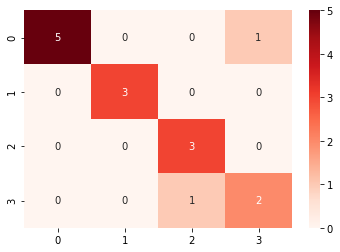

In [14]:
y_test_pred = model_knn.predict(x_test)
cm_train = confusion_matrix(y_test, y_test_pred)

sns.heatmap( cm_train, annot=True, cmap='Reds', yticklabels=[0,1,2, 3],
            xticklabels=[0,1, 2, 3])
plt.show()

### 2. decision tree

In [15]:
# pipline만들고 decision tree 모델 적용
model_tree = make_pipeline(ct, StandardScaler(), DecisionTreeClassifier(criterion="entropy"))
model_tree.fit(x_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(),
                                                  ['연료', '변속기'])])),
                ('standardscaler', StandardScaler()),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(criterion='entropy'))])

1) 예측값

In [16]:
print('예측값:' , model_tree.predict(t_sample))

예측값: ['소형']


2) f1 score (train/test)

In [17]:
print('train f1 score : ', model_tree.score(x_train, y_train))
print('test f1 score : ', model_tree.score(x_test, y_test))

train f1 score :  1.0
test f1 score :  0.8666666666666667


3) confusion heatmap

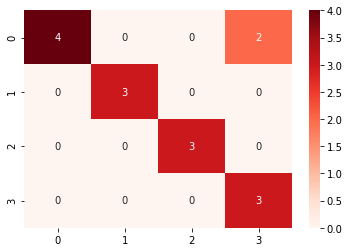

In [18]:
y_test_pred = model_tree.predict(x_test)
cm_train = confusion_matrix(y_test, y_test_pred)

sns.heatmap( cm_train, annot=True, cmap='Reds', yticklabels=[0,1,2, 3],
            xticklabels=[0,1, 2, 3])
plt.show()

### 3. Navie_Bayes

In [19]:
# pipline 만들기
model_nb = make_pipeline( ct, StandardScaler(), GaussianNB())
model_nb.fit(x_data, y_data)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(),
                                                  ['연료', '변속기'])])),
                ('standardscaler', StandardScaler()),
                ('gaussiannb', GaussianNB())])

1) 예측값

In [20]:
print('예측값: ', model_nb.predict(t_sample))

예측값:  ['소형']


2) f1 score (test/train)

In [21]:
print('test f1 score: ', model_nb.score(x_test, y_test))
print('train f1 score: ', model_nb.score(x_train, y_train))

test f1 score:  0.6
train f1 score:  0.5714285714285714


3) confusion heatmap

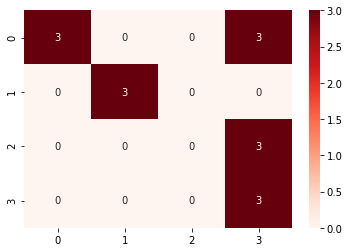

In [22]:
y_test_pred = model_nb.predict(x_test)
cm_train = confusion_matrix(y_test, y_test_pred)

sns.heatmap( cm_train, annot=True, cmap='Reds', yticklabels=[0,1,2, 3],
            xticklabels=[0,1, 2, 3])
plt.show()

### 4. SVC

In [23]:
model_svc = make_pipeline(ct,StandardScaler(), SVC())
model_svc.fit(x_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(),
                                                  ['연료', '변속기'])])),
                ('standardscaler', StandardScaler()), ('svc', SVC())])

1) 예측값

In [24]:
print('예측값: ', model_svc.predict(t_sample))

예측값:  ['소형']


2) f1 score (test/train)

In [25]:
print('test f1 score: ', model_svc.score(x_test, y_test))
print('train f1 score: ', model_svc.score(x_train, y_train))

test f1 score:  0.8666666666666667
train f1 score:  0.8571428571428571


3) confusion heatmap

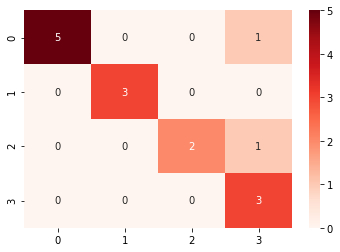

In [27]:
y_test_pred = model_svc.predict(x_test)
cm_train = confusion_matrix(y_test, y_test_pred)

sns.heatmap( cm_train, annot=True, cmap='Reds', yticklabels=[0,1,2, 3],
            xticklabels=[0,1, 2, 3])
plt.show()

### 5. BAR CHART

각모델별 train ,test f1 를  bar 그래프로 그리고,  
가장높은 f1 score 의 모델을 확인하시요.

In [28]:
df_chart = pd.DataFrame({
    'KNN':[model_knn.score(x_train, y_train), model_knn.score(x_test, y_test)], 
    'D-Tree':[model_tree.score(x_train, y_train), model_tree.score(x_test, y_test)], 
    'Naive_Bayes':[model_nb.score(x_train, y_train), model_nb.score(x_test, y_test)], 
    'SVC':[model_svc.score(x_train, y_train), model_svc.score(x_test, y_test)]
})

In [29]:
df_chart.rename(index={0:'f1_train_score', 1:'f1_test_score'})

,KNN,D-Tree,Naive_Bayes,SVC
f1_train_score,0.892857,1.000000,0.571429,0.857143
f1_test_score,0.866667,0.866667,0.600000,0.866667


In [30]:
label = ['KNN','D-Tree','Naive_Bayes','SVC']
index = np.arange(len(label))

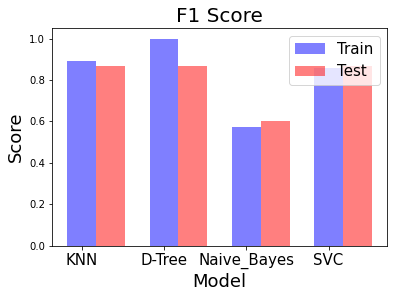

In [35]:
bar_width = 0.35
alpha = 0.5

p1 = plt.bar(index,  df_chart.iloc[0], 
             bar_width, 
             color='b', 
             alpha=alpha,
             label='Train')

p2 = plt.bar(index + bar_width,  df_chart.iloc[1], 
             bar_width, 
             color='r',
             alpha=alpha,
             label='Test')

plt.title('F1 Score', fontsize=20)
plt.ylabel('Score', fontsize=18)
plt.xlabel('Model', fontsize=18)
plt.xticks(index, label, fontsize=15)
plt.legend((p1[0], p2[0]), ('Train', 'Test'), fontsize=15)

plt.show()